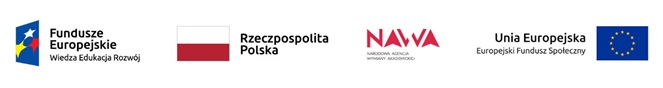

# Security of Big Data Analitics 

### Laboratory 06 "Analysis of data sets using artificial intelligence mechanisms"

#### Please insert bellow your firstname, lastnema and ID number and run this cell 
Mateusz Wiśniewski 148327

##### (if cell is not active, clik twice on it)



-------------------------------------------------------------------------------------------------------
###### The MNIST dataset was used in this exercise. This is one of the most popular datasets used for machine learning. It contains images of handwritten numbers (0-9) in a 28x28 pixel format.

The MNIST dataset consists of 60,000 training images and 10,000 test images. These images were collected from a variety of documents such as postal letters and identification cards. This collection is often used as a benchmark to test various machine learning algorithms, especially in the field of image classification.

The MNIST collection is relatively simple but still challenging to learn and can be a good starting point for people who want to learn how machine learning works in practice. It is often used in computer science as an example for learning image classification and neural networks. Details can be found on the website:  http://yann.lecun.com/exdb/mnist/

-------------------------------------------------------------------------------------------------------

To use the mentioned dataset you need to:

1. Import of required libraries


In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

2024-11-19 19:08:25.182448: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-19 19:08:25.354168: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-19 19:08:25.432479: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1732039705.578267   14943 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1732039705.607956   14943 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-19 19:08:25.852602: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

Answer the questions:

1.1) What is the tensorflow library used for?

1.2) What is the numpy library used for?

1.3) What is the matplotlib library used for?

------------------------------------------------------------------------------------------------------
1) TensorFlow is an open-source library used for machine learning and deep learning applications. It provides an ecosystem of tools that lets people easily build and deploy machine learning models.

2) NumPy is a math library. It provides support for arrays, matrices, and functions to operate on these data structures.

3) Matplotlib is a plotting library



2. Load training and test data

In [2]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


------------------------------------------------------------------------------------------------------
If you do not have a locally saved copy of this dataset, it will be downloaded - which can take up to a few minutes - a corresponding message will be displayed. If you have previously downloaded this dataset it will be loaded without an additional message

The training data will be loaded into the variables:

- training data: train_images (images), train_labels (labels)

- test data: test_images (images), test_labels (labels)

To display the sample images of the figures (according to number_printed_fig variable value), use the code from the cell below. It allows you to display analysed graphics showing manually written digits and their assigned labels - five per line

------------------------------------------------------------------------------------------------------

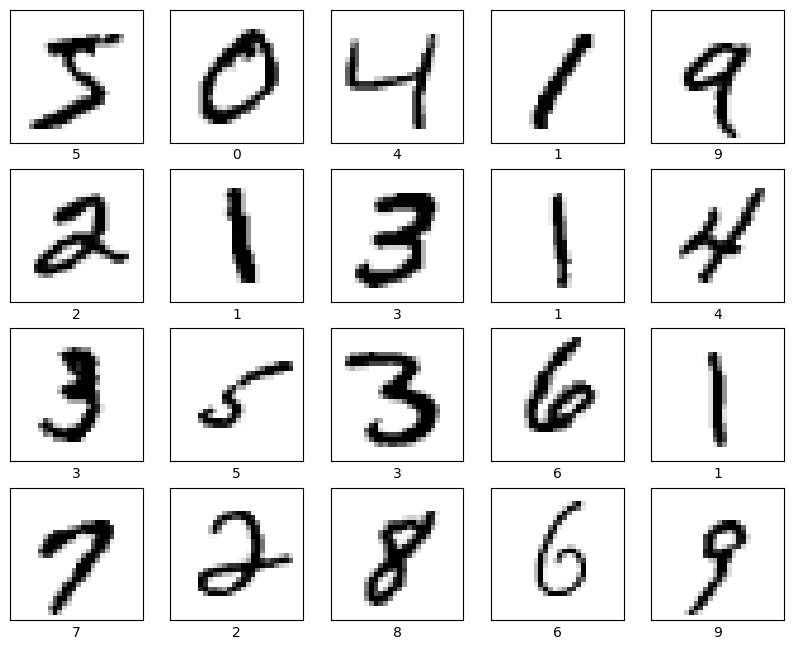

In [3]:
# number plotted figures 
number_printed_fig = 20

plt.figure(figsize=(10,10))
for i in range(number_printed_fig):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(train_labels[i])
plt.show()

------------------------------------------------------------------------------------------------------

------------------------------------------------------------------------------------------------------
3. Normalisation

Data normalisation is the process of transforming input data so that it falls within a specified range of values. For neural networks, where weights are updated based on input values, data normalisation can help improve the performance and accuracy of the network.

In image classification, the pixel values of images are usually represented as integers from 0 to 255. Data normalisation involves dividing the pixel values by the maximum value (255 in this case) so that the pixel values fall within the range of 0 to 1.

In the code, the training and test data (train_images and test_images) are normalised by dividing by 255 so that the pixel values fall between 0 and 1:

------------------------------------------------------------------------------------------------------

In [4]:
# copy of first number 
train_image_0 = train_images[0]
train_label_0 = train_labels[0]

#normalisation
train_images = train_images / 255.0
test_images = test_images / 255.0

# copy of first number after normalisation
train_image_0_norm = train_images[0]
train_label_0_norm = train_labels[0]

------------------------------------------------------------------------------------------------------
Answer the questions:

3.1 Are the images before and after normalisation different?

3.2 Display a single image as a matrix (print(train_image_0), print(train_image_0_norm)) and compare the values. To be sure it is the same digit modify the code to display the digit images and assess the differences visually.


3.1) The images before and after normalisation are different in terms of value range. Before normalisation, the pixel values range from 0 to 255, while after normalisation, the pixel values range from 0 to 1.


[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

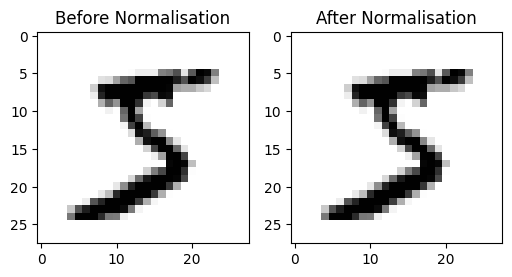

In [6]:
print(train_image_0)
print(train_image_0_norm)

plt.figure(figsize=(6,3))
plt.subplot(1, 2, 1)
plt.title("Before Normalisation")
plt.imshow(train_image_0, cmap=plt.cm.binary)
plt.subplot(1, 2, 2)
plt.title("After Normalisation")
plt.imshow(train_image_0_norm, cmap=plt.cm.binary)
plt.show()

---------------------
4. Model definition

Creating a neural network model using the Keras library. Keras is a high-level library for building and training neural networks in Python.

To create a model, you first need to define the architecture of the neural network, i.e. how the layers of the network are connected. In this case, I used a simple model consisting of three dense layers. The first layer is a 28x28 pixel input layer that processes the input data. The second layer is a hidden layer with 128 neurons and a relu activation function that processes the output from the input layer. The third layer is the output layer with 10 neurons, representing individual classes, and a softmax activation function that normalises the output to a probability distribution.

In [7]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

/home/avy/.local/lib/python3.11/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
2024-11-19 19:13:50.011160: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


----------------------
5. Model compilation

Then, to compile the model, you need to specify the loss function, optimiser and metrics that will be used when training the model. In this case, I used the loss function 'sparse_categorical_crossentropy', the optimiser 'adam' and the metric 'accuracy'. 

An optimiser (optimizer) is an algorithm used during the machine learning process that aims to minimise the loss function (loss function) by adjusting the model weights. The loss function determines how well the model performs in predicting correct values from the input data.

Optimisation algorithms use the gradient of the loss function to determine the direction in which the model weights should be changed to minimise the value of the loss function. There are a number of different optimisation algorithms that differ in the way the weights are updated.

sparse_categorical_crossentropy is a cost function that is often used in multiclass classification tasks.

In multi-class classification, the goal is to assign a given object to one of many classes. The cost function is used to assess the quality of the model's prediction, i.e. how well the model performs in predicting the correct class for a given object.

The accuracy (precision) metric is one of the simplest and most commonly used indicators of model performance in machine learning. It measures how well the model performs in predicting classes for test data. Accuracy is the ratio of the number of correct predictions to the total number of predictions, i.e:

accuracy = number of correct predictions / total number of predictions

For example, if the model is designed to recognise the handwritten digits 0 to 9, and it correctly predicts 95 out of 100 digits on the test set, the accuracy is 95/100, i.e. 0.95 or 95%.

In [8]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

-----------------------------
6 Model training

Model training is the process by which the model is adapted to the learning data. The aim of training is to minimise the cost function, a measure of the error between the true labels and the model's predictions. During training, the model is presented with a set of learning data and then fitted to this data by changing the weights in the neural network. This process is repeated for each training iteration, called an epoch.

To minimise the cost function, in each training iteration, the model calculates the values of the gradient of the cost function against the weights. The gradient indicates the direction of the fastest growth of the function, so to minimise the cost function, the model weights are updated in the opposite direction of the gradient. The rate at which the weights are updated is controlled by a hyperparameter called the learning rate. Getting the hyperparameters right is important for the model to be effective and generalise well on new data.

In [9]:
model.fit(train_images, train_labels, epochs=4)

Epoch 1/4


2024-11-19 19:13:59.517283: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8736 - loss: 0.4392
Epoch 2/4
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9654 - loss: 0.1199
Epoch 3/4
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9764 - loss: 0.0771
Epoch 4/4
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9819 - loss: 0.0574


--------------------------
7.  Testing the model

The function model.evaluate(test_images, test_labels, verbose=2) is used to evaluate performance on the test set. It takes two arguments:

- test_images - the test set of images
- test_labels - a test set of labels (classes) that correspond to each image in test_images

The function returns two values:

- the value of the cost function (loss) on the test set
- the value of a metric (metrics), specified during model compilation, on the test set. The default is accuracy (precision).

The verbose argument specifies the level of detail of the output. If you set verbose=2, the function will only output information about the number of test samples and the loss and accuracy values.

In [10]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\n dane testowe - accuracy:', test_acc)
print('\n dane testowe - loss:', test_loss)

313/313 - 1s - 2ms/step - accuracy: 0.9748 - loss: 0.0773

 dane testowe - accuracy: 0.9747999906539917

 dane testowe - loss: 0.07726071029901505


# Exercise 1 
Create a graph showing the value of the accuracy parameter as a function of the number of epochs (1, 2, 3, 4, 5, 6, 7, 8, 9, 10)


Epoch 1/10


2024-11-19 19:19:09.552031: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8808 - loss: 0.4242 - val_accuracy: 0.9607 - val_loss: 0.1361
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9639 - loss: 0.1257 - val_accuracy: 0.9737 - val_loss: 0.0922
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9763 - loss: 0.0803 - val_accuracy: 0.9739 - val_loss: 0.0836
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9823 - loss: 0.0578 - val_accuracy: 0.9760 - val_loss: 0.0794
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9863 - loss: 0.0444 - val_accuracy: 0.9733 - val_loss: 0.0836
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9888 - loss: 0.0346 - val_accuracy: 0.9772 - val_loss: 0.0761
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9919 - loss: 0.0267 - val_accuracy: 0.9777 - val_loss: 0.0719
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9941 - loss: 0.0194 - val_accura

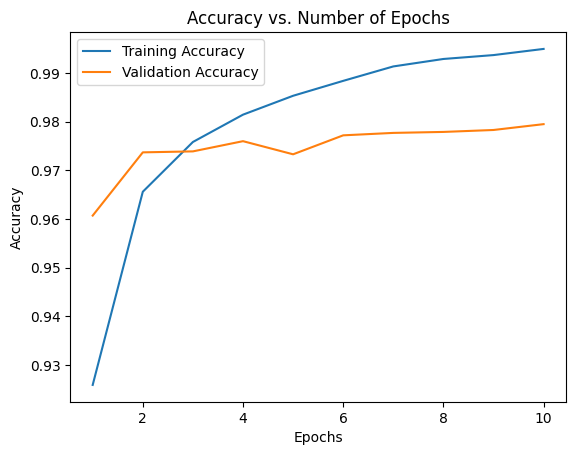

In [12]:
#code
epochs = 10

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=epochs, validation_data=(test_images, test_labels))

plt.plot(range(1, epochs + 1), history.history['accuracy'], label='Training Accuracy')
plt.plot(range(1, epochs + 1), history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Number of Epochs')
plt.legend()
plt.show()

your conclusions (if not active click twice):

Model's accuracy on training data rose quickly to a respectable 98% after 4 epochs. After that, accuracy was slowly climbing up to almost 100%, but validation accuracy has remained basically constant around 97-98%. 

# Exercise 2 
Create a graph showing the value of the loss parameter as a function of the number of epochs

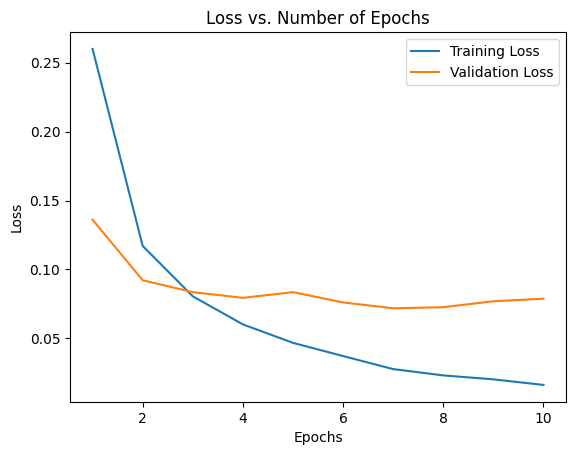

In [13]:
plt.plot(range(1, epochs + 1), history.history['loss'], label='Training Loss')
plt.plot(range(1, epochs + 1), history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs. Number of Epochs')
plt.legend()
plt.show()

your conclusions (if not active click twice):

Similiar to accuracy, while training loss keeps going down, validation loss has stayed relatively constant at around 0.1.

# Exercise 3
Find out which other optimisers can be used to compile the model, choose one and produce graphs for the accuracy and loss parameters. Which optimiser is better (i.e. which needs fewer epochs)?

/home/avy/.local/lib/python3.11/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10


2024-11-19 19:27:03.472614: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.7380 - loss: 1.0021 - val_accuracy: 0.9036 - val_loss: 0.3536
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9016 - loss: 0.3520 - val_accuracy: 0.9182 - val_loss: 0.2932
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9162 - loss: 0.2930 - val_accuracy: 0.9285 - val_loss: 0.2610
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9252 - loss: 0.2638 - val_accuracy: 0.9323 - val_loss: 0.2400
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9306 - loss: 0.2395 - val_accuracy: 0.9366 - val_loss: 0.2221
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9375 - loss: 0.2229 - val_accuracy: 0.9412 - val_loss: 0.2070
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9435 - loss: 0.2034 - val_accuracy: 0.9448 - val_loss: 0.1952
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9470 - loss: 0.1881 - val_accurac

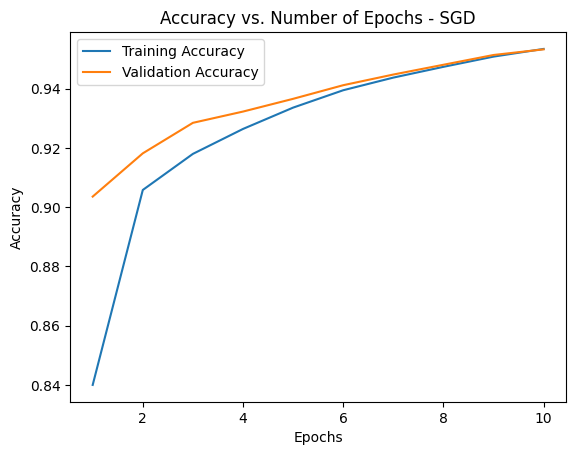

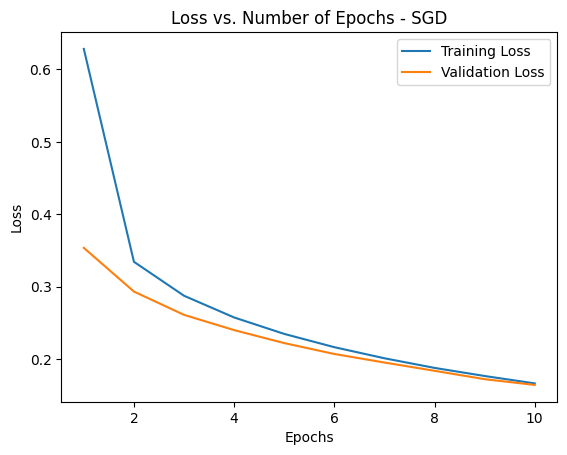

In [14]:
epochs = 10

model_sgd = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

model_sgd.compile(optimizer='sgd',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history_sgd = model_sgd.fit(train_images, train_labels, epochs=epochs, validation_data=(test_images, test_labels))

plt.plot(range(1, epochs + 1), history_sgd.history['accuracy'], label='Training Accuracy')
plt.plot(range(1, epochs + 1), history_sgd.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Number of Epochs - SGD')
plt.legend()
plt.show()

plt.plot(range(1, epochs + 1), history_sgd.history['loss'], label='Training Loss')
plt.plot(range(1, epochs + 1), history_sgd.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs. Number of Epochs - SGD')
plt.legend()
plt.show()

your conclusions (if not active click twice):

SGD optimizer is significantly worse in terms of both the accuracy, loss and the speed of training.


## Answer the questions:

1. How can the presented image detection process be interfered with?
2. Can it be defended against?



your conclusions (if not active click twice):
1) The image detection process can be interfered with by introducing noise. This can cause the model to misclassify the images.

2. Defending against such interferences can be achieved by using noisy images during training, thus making the model more robust.